# Exploratory Data Analysis - Terrorism (Level - Intermediate)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
!wget https://github.com/preyash2047/TSF_Task/blob/main/Data%20Science%20Task/Task%204/Global%20Terrorism%20-%20START%20data.zip?raw=true

--2021-01-20 06:37:50--  https://github.com/preyash2047/TSF_Task/blob/main/Data%20Science%20Task/Task%204/Global%20Terrorism%20-%20START%20data.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/preyash2047/TSF_Task/raw/main/Data%20Science%20Task/Task%204/Global%20Terrorism%20-%20START%20data.zip [following]
--2021-01-20 06:37:50--  https://github.com/preyash2047/TSF_Task/raw/main/Data%20Science%20Task/Task%204/Global%20Terrorism%20-%20START%20data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/preyash2047/TSF_Task/main/Data%20Science%20Task/Task%204/Global%20Terrorism%20-%20START%20data.zip [following]
--2021-01-20 06:37:50--  https://raw.githubusercontent.com/preyash2047/TSF_Task/main/Data%20Science%20Task/Task%204/Global%20Terro

In [4]:
path = "/content/Global Terrorism - START data.zip?raw=true"
from zipfile import ZipFile 
with ZipFile(path, 'r') as zip: 
	zip.printdir() 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 

File Name                                             Modified             Size
globalterrorismdb_0718dist.csv                 2019-09-20 03:15:04    162812896
Extracting all the files now...
Done!


In [69]:
dataset = pd.read_csv("/content/globalterrorismdb_0718dist.csv", sep=",", encoding = "ISO-8859-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
sdataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

# Feature Selection

In [50]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [52]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Droping the data which does not have Year

In [53]:
dataset.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [54]:
for i in dataset.columns:
  print(i , end="\t")

eventid	iyear	imonth	iday	approxdate	extended	resolution	country	country_txt	region	region_txt	provstate	city	latitude	longitude	specificity	vicinity	location	summary	crit1	crit2	crit3	doubtterr	alternative	alternative_txt	multiple	success	suicide	attacktype1	attacktype1_txt	attacktype2	attacktype2_txt	attacktype3	attacktype3_txt	targtype1	targtype1_txt	targsubtype1	targsubtype1_txt	corp1	target1	natlty1	natlty1_txt	targtype2	targtype2_txt	targsubtype2	targsubtype2_txt	corp2	target2	natlty2	natlty2_txt	targtype3	targtype3_txt	targsubtype3	targsubtype3_txt	corp3	target3	natlty3	natlty3_txt	gname	gsubname	gname2	gsubname2	gname3	gsubname3	motive	guncertain1	guncertain2	guncertain3	individual	nperps	nperpcap	claimed	claimmode	claimmode_txt	claim2	claimmode2	claimmode2_txt	claim3	claimmode3	claimmode3_txt	compclaim	weaptype1	weaptype1_txt	weapsubtype1	weapsubtype1_txt	weaptype2	weaptype2_txt	weapsubtype2	weapsubtype2_txt	weaptype3	weaptype3_txt	weapsubtype3	weapsubtype3_txt	weaptype4	weapt

In [55]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [70]:
dataset = dataset[["iyear","imonth","iday","country_txt","region_txt","provstate","attacktype1_txt",
                   "targtype1_txt","gname","claimed",'weaptype1_txt','nkill','nwound','summary']]

In [57]:
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

In [58]:
for i in dataset.columns:
  if i in ["iyear","imonth"]:
    print(f"{i}: {dataset[i].unique()}\n")

iyear: [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]

imonth: [ 7  0  1  2  3  4  5  6  8  9 10 11 12]



# Renaming the Columns

In [76]:
dataset.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day','attacktype1_txt':'Attacktype','target1' : 'Target','country_txt':'Country',
                 'region_txt':'Region', 'provstate': 'state','targtype1_txt':'Targtype','gname':'Group', 'claimed':'Claimed',
                 'weaptype1_txt':'Weaptype','nkill':'kill','nwound':'wounded','summary': 'Summary',},inplace=True)

# Missing Data

In [77]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

In [78]:
dataset.isna().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
state           421
Attacktype        0
Targtype          0
Group             0
Claimed       66120
Weaptype          0
kill          10313
wounded       16311
Summary       66129
dtype: int64

Note: We can't perform drop drop_duplicates as we have removed the event id and it can be true that same type of attack happen at same place for many tyme

In [80]:
dataset

,Year,Month,Day,Country,Region,state,Attacktype,Targtype,Group,Claimed,Weaptype,kill,wounded,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Armed Assault,Military,Al-Shabaab,1.0,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Bombing/Explosion,Military,Muslim extremists,0.0,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0.0,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...
181689,2017,12,31,India,South Asia,Manipur,Bombing/Explosion,Government (General),Unknown,0.0,Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...


# Yearwise Attack Plot

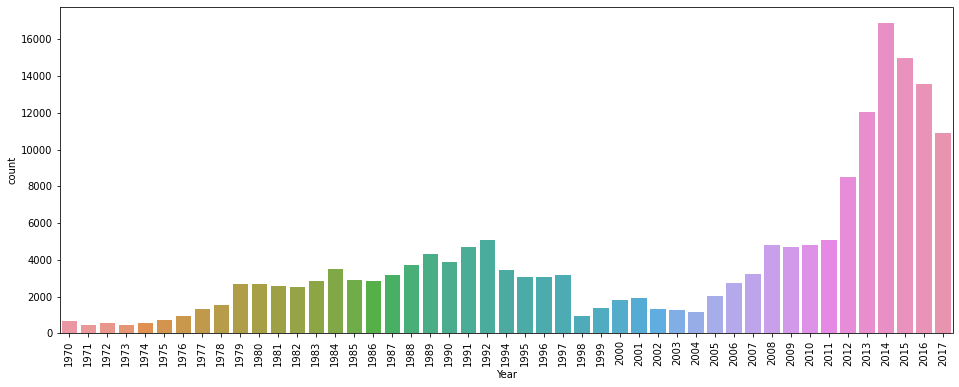

In [96]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.countplot(x=dataset.Year)

# Country wise Attack Plot

<BarContainer object of 56 artists>

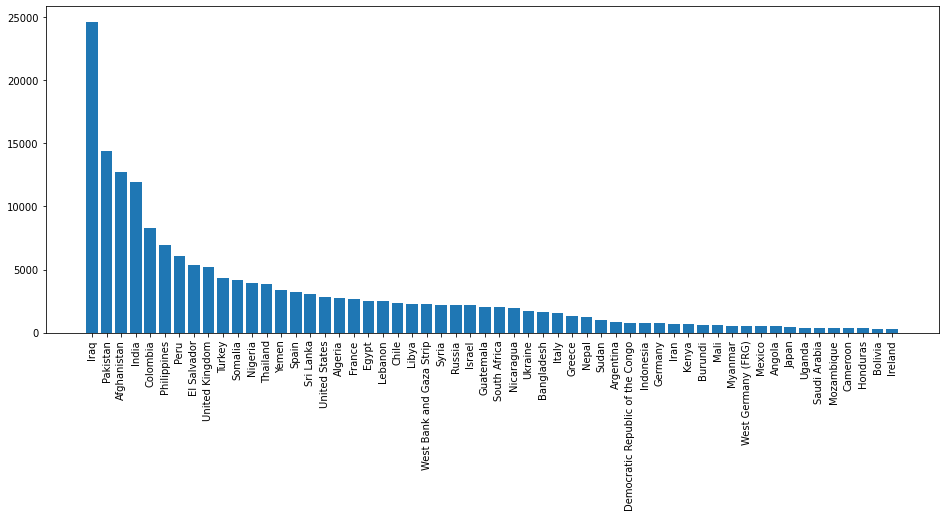

In [164]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
temp_count = dataset.Country.value_counts()
temp_count = temp_count.where(temp_count > 300).dropna()
plt.bar(temp_count.index,temp_count)

# Attack type Countplot

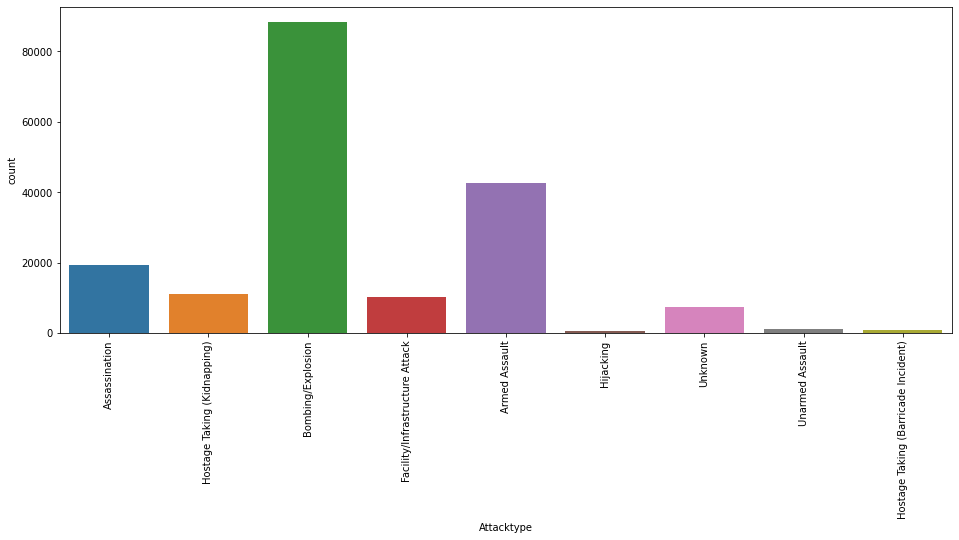

In [165]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.countplot(x=dataset.Attacktype)

# Targtype Countplot

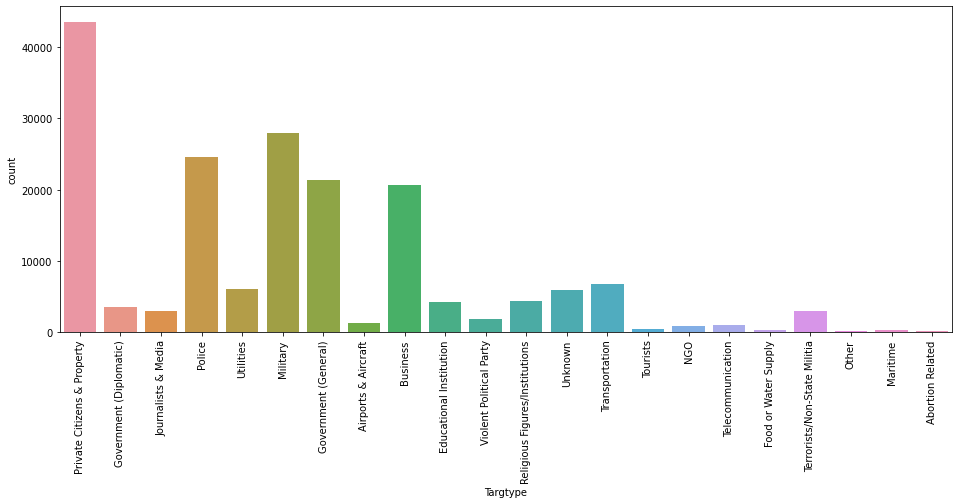

In [166]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.countplot(x=dataset.Targtype)

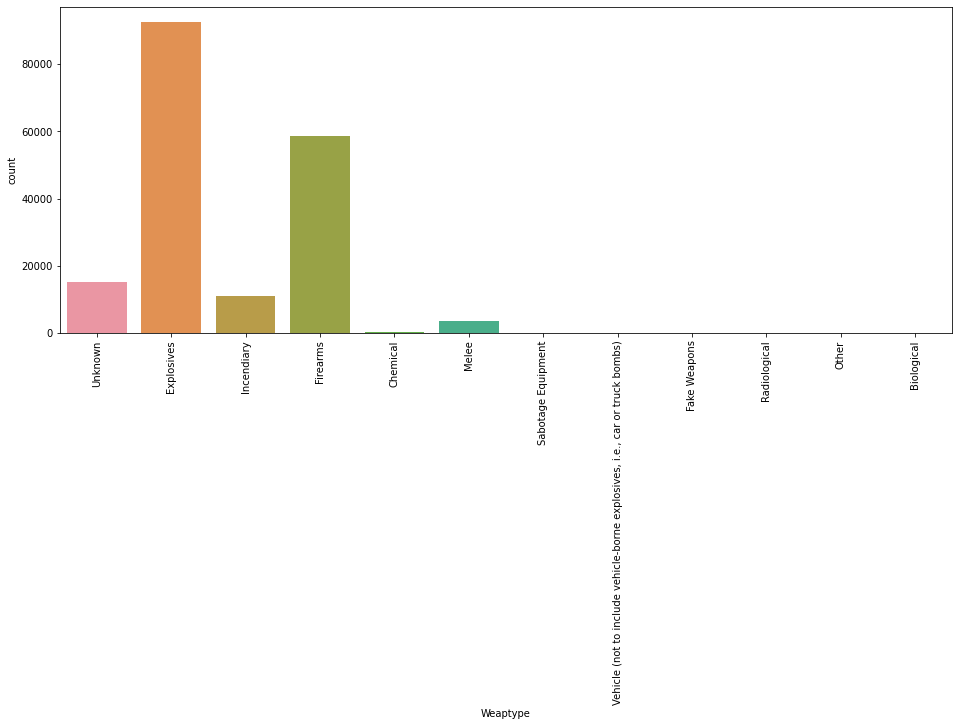

In [188]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.countplot(x=dataset.Weaptype)

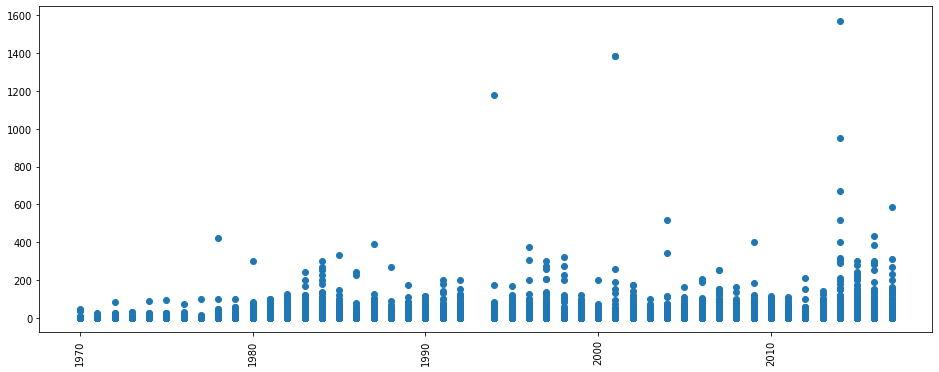

In [198]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.scatter(dataset[["Year"]],dataset[["kill"]])